In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
from MPyDATA_examples.condensational_growth.analysis import figure_data
from MPyDATA_examples.condensational_growth.physics.equilibrium_drop_growth import PdfEvolver
from MPyDATA_examples.condensational_growth.plotter import Plotter
from MPyDATA_examples.condensational_growth.setup import setup

In [3]:
results = figure_data()

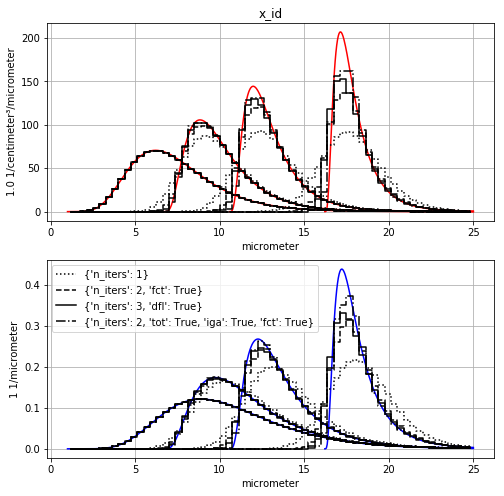

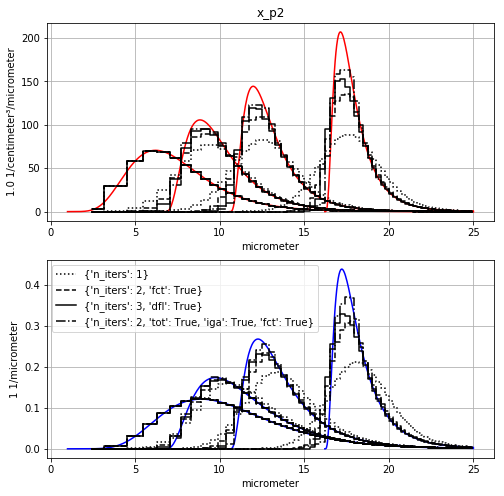

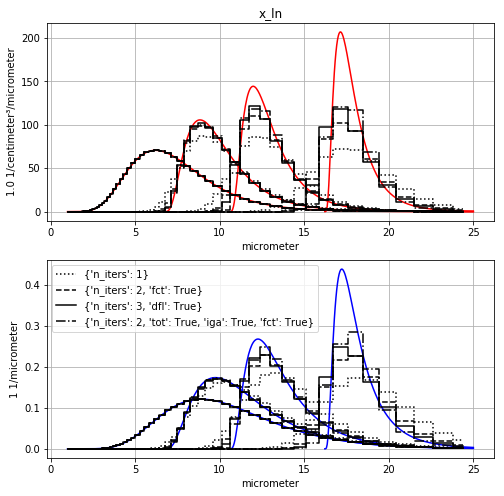

In [4]:
for coord in results.keys():
    plotter = Plotter(setup.r_min, setup.r_max, coord)
    for opt_i, opts in enumerate(results[coord].keys()): 
        plot_data = results[coord][opts]
        for i in range(len(setup.nt)):
            mnorm = setup.mixing_ratios[i]
            t = setup.nt[i] * setup.dt
            if opt_i == 0:
                plotter.analytical_pdf(PdfEvolver(setup.pdf, setup.drdt, t), mnorm)
            plotter.numerical_pdf(
                plot_data['r'], 
                plot_data['n'][i], 
                label=opts, 
                bin_boundaries=plot_data['rh'], 
                mnorm=mnorm
            )
    plotter.done()